# 1. Import the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/CS5344 Project/Data and Codes'

import pandas as pd
import os

pd.set_option('display.max_colwidth', None)   # Don't truncate the data when printed

train_df = pd.read_csv(os.path.join(path, "train.csv"))
dev_df = pd.read_csv(os.path.join(path, "dev.csv"))
test_df = pd.read_csv(os.path.join(path, "test.csv"))

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


# 2. Simple EDA

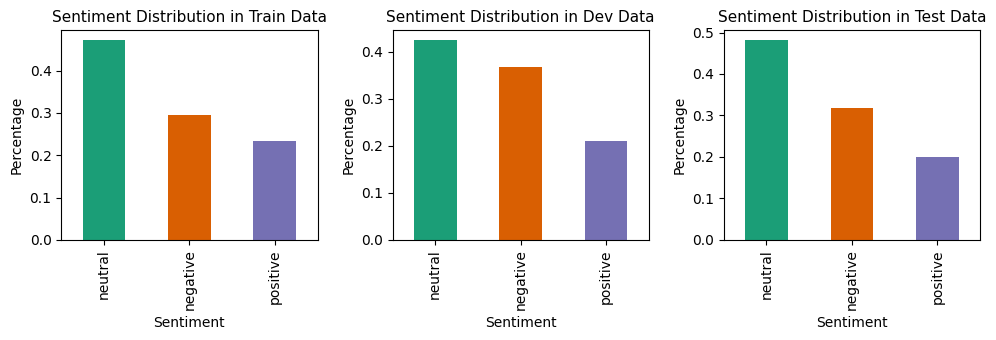

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5))

# Train data sentiment distribution
train_df['Sentiment'].value_counts(normalize=True).plot(kind='bar', ax=axes[0], color=sns.palettes.mpl_palette('Dark2'))
axes[0].set_title('Sentiment Distribution in Train Data', size = 11)
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Percentage')

# Dev data sentiment distribution
dev_df['Sentiment'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=sns.palettes.mpl_palette('Dark2'))
axes[1].set_title('Sentiment Distribution in Dev Data', size = 11)
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Percentage')

# Test data sentiment distribution
test_df['Sentiment'].value_counts(normalize=True).plot(kind='bar', ax=axes[2], color=sns.palettes.mpl_palette('Dark2'))
axes[2].set_title('Sentiment Distribution in Test Data', size = 11)
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

# 3. Text data preprocessing

## 3.1 clean and tokenize

In [5]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.5 MB/s eta 0:00:00


In [6]:
import nltk
import re
from nltk.corpus import stopwords     # use nltk stopwords
from nltk.tokenize import word_tokenize
import contractions             # expand shortforms
import string

nltk.download('punkt')            # a pretrained word segmentation model
nltk.download('punkt_tab')          # Download punkt_tab for sentence tokenization
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Approach1: remove stop words and special characters

In [7]:
def clean_and_tokenize(text):
  text = text.lower()           # Convert to lowercase
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  tokens = word_tokenize(text)      # Tokenize the text
  tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words
  return tokens

In [8]:
train_df['cleaned_text'] = train_df['Utterance'].apply(clean_and_tokenize)
train_df[['Utterance', 'cleaned_text']].head(10)

,Utterance,cleaned_text
0,also I was the point person on my companys transition from the KL-5 to GR-6 system.,"[also, point, person, companys, transition, kl5, gr6, system]"
1,You mustve had your hands full.,"[mustve, hands, full]"
2,That I did. That I did.,[]
3,So lets talk a little bit about your duties.,"[lets, talk, little, bit, duties]"
4,My duties? All right.,"[duties, right]"
5,"Now youll be heading a whole division, so youll have a lot of duties.","[youll, heading, whole, division, youll, lot, duties]"
6,I see.,[see]
7,But therell be perhaps 30 people under you so you can dump a certain amount on them.,"[therell, perhaps, 30, people, dump, certain, amount]"
8,Good to know.,"[good, know]"
9,We can go into detail,"[go, detail]"


In [9]:
dev_df['cleaned_text'] = dev_df['Utterance'].apply(clean_and_tokenize)
test_df['cleaned_text'] = test_df['Utterance'].apply(clean_and_tokenize)

### Approach2: retain stopwords and expand short forms

In [10]:
def clean_and_tokenize_new(text):
  """
    Cleans and tokenizes text, expanding contractions and removing special characters.
    without removing stopwords
  """
  # Fix Windows-1252 encoding issues; otherwise, contractions cannot be properly expanded
  text = text.encode("utf-8", "ignore").decode("utf-8")  # Clean corrupted characters
  text = text.replace("\x92", "'")             # Directly replace \x92 with a standard single quote.

  text = contractions.fix(text)      # Expand contractions
  text = text.lower()           # Convert to lowercase
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  tokens = word_tokenize(text)      # Tokenize the text
  return tokens

train_df['cleaned_text_new'] = train_df['Utterance'].apply(clean_and_tokenize_new)
train_df[['Utterance', 'cleaned_text_new']].head(10)

,Utterance,cleaned_text_new
0,also I was the point person on my companys transition from the KL-5 to GR-6 system.,"[also, i, was, the, point, person, on, my, companys, transition, from, the, kl5, to, gr6, system]"
1,You mustve had your hands full.,"[you, must, have, had, your, hands, full]"
2,That I did. That I did.,"[that, i, did, that, i, did]"
3,So lets talk a little bit about your duties.,"[so, let, us, talk, a, little, bit, about, your, duties]"
4,My duties? All right.,"[my, duties, all, right]"
5,"Now youll be heading a whole division, so youll have a lot of duties.","[now, you, will, be, heading, a, whole, division, so, you, will, have, a, lot, of, duties]"
6,I see.,"[i, see]"
7,But therell be perhaps 30 people under you so you can dump a certain amount on them.,"[but, there, will, be, perhaps, 30, people, under, you, so, you, can, dump, a, certain, amount, on, them]"
8,Good to know.,"[good, to, know]"
9,We can go into detail,"[we, can, go, into, detail]"


In [11]:
dev_df['cleaned_text_new'] = dev_df['Utterance'].apply(clean_and_tokenize_new)
test_df['cleaned_text_new'] = test_df['Utterance'].apply(clean_and_tokenize_new)

## 3.2 Vectorization

### TF-IDF
Converts text data into a matrix where each row represents a document and each column represents the TF-IDF value of a word.

#### Approach 1

In [12]:
# Join tokens back into a string for TF-IDF vectorization
train_df['cleaned_text_tfidf'] = train_df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_df['cleaned_text_tfidf'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print('TF-IDF Vectorization Shape: ', tfidf_df.shape)
train_tfidf = pd.concat([train_df['Sentiment'], tfidf_df], axis=1)

TF-IDF Vectorization Shape:  (9989, 5748)


In [29]:
print(tfidf_df.columns.values)
tfidf_df.head(3)

['10' '100' '1000' ... 'zone' 'zoo' 'zygomatic']


,10,100,1000,110,112,11b,12,1200,13,15,...,zelda,zelner,zelners,zero,zillionaire,zinfandel,zip,zone,zoo,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# dev and test dataset
dev_df['cleaned_text'] = dev_df['Utterance'].apply(clean_and_tokenize)
test_df['cleaned_text'] = test_df['Utterance'].apply(clean_and_tokenize)

dev_df['cleaned_text_tfidf'] = dev_df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))
test_df['cleaned_text_tfidf'] = test_df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))

dev_tfidf_matrix = vectorizer.transform(dev_df['cleaned_text_tfidf'])
test_tfidf_matrix = vectorizer.transform(test_df['cleaned_text_tfidf'])

dev_tfidf = pd.DataFrame(dev_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf = pd.DataFrame(test_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

dev_tfidf = pd.concat([dev_df['Sentiment'], dev_tfidf], axis=1)
test_tfidf = pd.concat([test_df['Sentiment'], test_tfidf], axis=1)

#### Approach 2

In [19]:
train_df['cleaned_text_tfidf_new'] = train_df['cleaned_text_new'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_df['cleaned_text_tfidf_new'])

tfidf_df_new = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print('TF-IDF Vectorization Shape: ', tfidf_df_new.shape)
train_tfidf_new = pd.concat([train_df['Sentiment'], tfidf_df_new], axis=1)

TF-IDF Vectorization Shape:  (9989, 5775)


In [31]:
print(tfidf_df_new.columns.values)
tfidf_df_new.head(3)

['10' '100' '1000' ... 'zone' 'zoo' 'zygomatic']


,10,100,1000,110,112,11b,12,1200,13,15,...,zelda,zelner,zelners,zero,zillionaire,zinfandel,zip,zone,zoo,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dev_df['cleaned_text_tfidf_new'] = dev_df['cleaned_text_new'].apply(lambda tokens: ' '.join(tokens))
test_df['cleaned_text_tfidf_new'] = test_df['cleaned_text_new'].apply(lambda tokens: ' '.join(tokens))

dev_tfidf_matrix = vectorizer.transform(dev_df['cleaned_text_tfidf_new'])
test_tfidf_matrix = vectorizer.transform(test_df['cleaned_text_tfidf_new'])

dev_tfidf_new = pd.DataFrame(dev_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf_new = pd.DataFrame(test_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

dev_tfidf_new = pd.concat([dev_df['Sentiment'], dev_tfidf_new], axis=1)
test_tfidf_new = pd.concat([test_df['Sentiment'], test_tfidf_new], axis=1)

### Word2Vec

In [ ]:
!pip install --upgrade numpy

In [ ]:
# must restart the runtime in order to use newly installed versions.
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

#### Approach1

In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_df['cleaned_text'].tolist(), vector_size=200, window=5, min_count=1, workers=4)  # context window = 5
word2vec_model.save("word2vec.model")

In [ ]:
# average the vectors of all words in a sentence.

def embedding_word2vec(sentence, model):
  embeddings = []
  for word in sentence:
    try:
      embeddings.append(model.wv[word])     # For each word, get its Word2Vec vector.
    except KeyError:
      pass                    # Ignore words not in vocabulary
  if embeddings:
    return sum(embeddings) / len(embeddings)  # Calculate the average of all the word vectors in the utterance as an embedded representation of the sentence.
  else:                       # cleaned_text = []
    return [0] * model.vector_size


train_df['word2vec_embedding'] = train_df['cleaned_text'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model))

In [ ]:
train_df[['Utterance', 'cleaned_text', 'word2vec_embedding']].head(3)

,Utterance,cleaned_text,word2vec_embedding
0,also I was the point person on my companys transition from the KL-5 to GR-6 system.,"[also, point, person, companys, transition, kl5, gr6, system]","[0.0087913675, -0.018249033, 0.0044272407, 0.029462177, 0.030981094, -0.0363729, -0.011548842, 0.06448716, -0.004506191, 0.01003102, -0.02322723, -0.021663032, 0.0077900267, 0.02323591, -0.012034361, -0.028960664, -0.02310387, -0.011866646, 0.010518387, -0.044594772, 0.008750515, -0.020092439, -0.015384608, 0.0054225023, -0.0014119692, -0.02613314, -0.0038386837, -0.029734667, -0.03523495, 0.033812866, 0.053350702, 0.016285367, 0.019518327, 0.014053987, 0.002095473, 0.040529534, 0.029609665, -0.0122369835, -0.01609698, -0.048797574, -0.035101455, -0.0052610664, -0.0066742147, 0.00955715, 0.051593084, -0.025026662, -0.0022054333, -0.015857134, 0.021493213, 0.03154843, 0.017052248, -0.014089443, -0.014201616, -0.019395325, 0.016357685, -0.009341406, 0.0070502623, -0.012575512, -0.04060427, -0.0008738964, -0.020958658, 0.013678898, -0.009014227, -0.011773609, -0.05506061, 0.02019397, -0.007942806, 0.05551655, -0.032237604, 0.051257163, 0.005145561, -0.0009002256, 0.043975927, 0.0029465402, 0.016769076, 0.010540095, 0.031210536, -0.03955345, -0.05174005, -0.0013527165, -0.013963912, -0.012578975, -0.018174032, 0.0590235, -0.030876113, -0.014887259, -0.01251729, 0.055259738, 0.010004626, -0.0011557632, 0.011698513, 0.040523566, 0.027389903, 0.040968407, 0.051137418, 0.04518661, 0.017501326, -0.024848547, 0.03390888, 0.021786306, ...]"
1,You mustve had your hands full.,"[mustve, hands, full]","[0.010686328, -0.017206317, 0.008104553, 0.028672999, 0.028580481, -0.035366703, -0.010752982, 0.06694005, -0.005293537, 0.00798969, -0.020641893, -0.019537328, 0.008888966, 0.02618373, -0.012341081, -0.029337486, -0.024459803, -0.011860627, 0.008886576, -0.046250064, 0.009015518, -0.022692526, -0.015354887, 0.00816165, -0.004021044, -0.027702196, -0.0020000369, -0.03146644, -0.03799251, 0.035257578, 0.053143054, 0.016587794, 0.021111384, 0.016625173, 0.0022376617, 0.03957429, 0.028376522, -0.01234139, -0.01536063, -0.05005415, -0.034895368, -0.008493345, -0.0062610623, 0.009692176, 0.055417772, -0.023484385, -0.00059417315, -0.011331614, 0.02549921, 0.032937583, 0.018222464, -0.01522671, -0.012402643, -0.02190675, 0.01650857, -0.00657036, 0.00947623, -0.015806863, -0.04321866, 1.0626856e-05, -0.021282872, 0.015758114, -0.008705988, -0.0072447695, -0.05672915, 0.018291855, -0.010610255, 0.057017986, -0.028281422, 0.05616465, 0.0070709772, 0.001204631, 0.042873193, 0.0050033224, 0.017731017, 0.013004567, 0.030713862, -0.041195426, -0.053248003, -0.0027070732, -0.012450893, -0.013347748, -0.02115492, 0.06014754, -0.03315829, -0.01688428, -0.012490697, 0.054011803, 0.010943475, 0.0010450917, 0.012552568, 0.042190045, 0.029174482, 0.04149847, 0.050191183, 0.04878244, 0.01792144, -0.028220868, 0.033066332, 0.025258439, ...]"
2,That I did. That I did.,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


In [ ]:
print(train_df['word2vec_embedding'][0].shape)

(200,)


In [ ]:
dev_df['word2vec_embedding'] = dev_df['cleaned_text'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model))
test_df['word2vec_embedding'] = test_df['cleaned_text'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model))

#### Approach2

In [ ]:
# Train Word2Vec model on new data
word2vec_model_new = Word2Vec(sentences=train_df['cleaned_text_new'].tolist(), vector_size=200, window=5, min_count=1, workers=4)  # context window = 5
word2vec_model_new.save("word2vec.model")

In [ ]:
train_df['word2vec_embedding_new'] = train_df['cleaned_text_new'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model_new))
train_df[['Utterance', 'cleaned_text_new', 'word2vec_embedding_new']].head(3)

,Utterance,cleaned_text_new,word2vec_embedding_new
0,also I was the point person on my companys transition from the KL-5 to GR-6 system.,"[also, i, was, the, point, person, on, my, companys, transition, from, the, kl5, to, gr6, system]","[0.06910049, -0.069836125, 0.04424009, 0.13773291, 0.20431738, -0.28992942, 0.104591995, 0.527072, -0.122546956, 0.05476904, -0.12082575, -0.1365795, -0.043211155, 0.21213251, -0.20766477, -0.06301655, -0.1615753, 0.09694578, -0.10965131, -0.6289965, 0.08968392, -0.16754858, 0.0680416, 0.027555149, -0.003496354, -0.062450934, 0.091209784, -0.2776525, -0.21941362, 0.060797684, 0.31216425, 0.09029405, 0.12872256, -0.08708239, -0.120228566, 0.16906983, 0.15469337, -0.10883346, -0.19668551, -0.30904424, -0.22651564, -0.036907706, -0.12798907, 0.09938566, 0.38610053, -0.024366306, -0.13819146, -0.21872382, 0.2710674, 0.17337814, 0.1358554, -0.16692263, -0.2268227, -0.13427122, 0.14993379, -0.24755423, -0.03449633, -0.29649633, -0.37431842, 0.10688089, -0.07120187, -0.047870167, 0.13478664, -0.005164874, -0.5873528, 0.15260576, -0.13739778, 0.55514455, -0.2680307, 0.47190416, -0.1433337, 0.10242758, 0.24028663, 0.13241552, 0.15787528, 0.19776085, 0.35167634, -0.41646358, -0.44026983, -0.14340709, -0.09357017, -0.15787874, -0.21622424, 0.4198113, -0.26252785, -0.041262887, 0.091281086, 0.21164252, -0.03298684, -0.03246474, 0.21772572, 0.2898335, 0.29431286, 0.38789362, 0.489942, 0.41445693, 0.09704219, -0.10018908, 0.10276559, 0.16448134, ...]"
1,You mustve had your hands full.,"[you, must, have, had, your, hands, full]","[0.090721, -0.086993165, 0.044786353, 0.1614045, 0.22335288, -0.31556675, 0.13045749, 0.5824768, -0.12974821, 0.05974247, -0.11799999, -0.14839382, -0.035082795, 0.21584308, -0.22595322, -0.065203674, -0.16630399, 0.105516985, -0.114405476, -0.6812943, 0.10325644, -0.18300162, 0.07547929, 0.013889986, 0.00906927, -0.065703236, 0.103384696, -0.30792835, -0.22662878, 0.072415456, 0.3305493, 0.08094505, 0.1509771, -0.09974616, -0.13074248, 0.19525234, 0.15941551, -0.11826963, -0.22014342, -0.33011794, -0.2468925, -0.049901813, -0.14769998, 0.11249898, 0.40087417, -0.030818447, -0.15472732, -0.25265104, 0.28777972, 0.17881416, 0.14460918, -0.19324182, -0.25174233, -0.12543085, 0.1373317, -0.26036164, -0.039315946, -0.3394663, -0.4210767, 0.117294155, -0.08505785, -0.052487005, 0.143747, -0.002613545, -0.64246166, 0.1772648, -0.14719632, 0.60304433, -0.29563838, 0.4876849, -0.13805959, 0.13030091, 0.2681593, 0.13774154, 0.17464998, 0.21161005, 0.38780457, -0.44786882, -0.49326953, -0.13718559, -0.10223682, -0.1638381, -0.2165459, 0.45502973, -0.2899993, -0.046156, 0.09690422, 0.24321517, -0.041896325, -0.025493415, 0.24212074, 0.33600017, 0.31468, 0.42264527, 0.54476863, 0.44940358, 0.10547477, -0.11481343, 0.113371074, 0.17903356, ...]"
2,That I did. That I did.,"[that, i, did, that, i, did]","[0.1277169, -0.13286804, 0.060049683, 0.2948461, 0.3010144, -0.47112116, 0.24021691, 0.8995927, -0.1956311, 0.10152862, -0.115815036, -0.19645798, -0.05639993, 0.34458145, -0.37092924, -0.0576988, -0.19114308, 0.17763217, -0.19906789, -1.0256323, 0.16466652, -0.25782362, 0.14428996, 0.032224044, -0.021172682, -0.09682842, 0.1782888, -0.4624145, -0.33224237, 0.101394475, 0.47722316, 0.080957785, 0.26491332, -0.10788331, -0.15531021, 0.2993354, 0.25404462, -0.1588665, -0.33111954, -0.47089052, -0.36863723, -0.08919344, -0.26768982, 0.15695277, 0.5287509, -0.05619408, -0.2469153, -0.37740597, 0.4239255, 0.28813073, 0.16838717, -0.2651583, -0.357439, -0.1890394, 0.16713648, -0.372443, -0.061121974, -0.543859, -0.623151, 0.19294083, -0.15637875, -0.07023419, 0.2096812, -0.021151932, -0.97025734, 0.26113185, -0.21869333, 0.903418, -0.42985582, 0.7005022, -0.17578411, 0.22015703, 0.35891655, 0.17254885, 0.29809335, 0.32085606, 0.59847444, -0.6172498, -0.7229843, -0.17584513, -0.13139768, -0.23461814, -0.29816052, 0.7112131, -0.46549368, -0.069454946, 0.17270549, 0.3302519, -0.073602, -0.02830746, 0.370

In [ ]:
dev_df['word2vec_embedding_new'] = dev_df['cleaned_text_new'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model_new))
test_df['word2vec_embedding_new'] = test_df['cleaned_text_new'].apply(lambda sentence: embedding_word2vec(sentence, word2vec_model_new))

### BERT

In [38]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [39]:
def bert_vectorization(text):
  # return PyTorch tensors;
  inputs = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
  outputs = bert_model(**inputs)
  return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

#### Approach1

In [40]:
# need 10mins to run
train_df['bert_embedding'] = train_df['cleaned_text'].apply(lambda x: ','.join(x)).apply(bert_vectorization)

In [41]:
dev_df['bert_embedding'] = dev_df['cleaned_text'].apply(lambda x: ','.join(x)).apply(bert_vectorization)
test_df['bert_embedding'] = test_df['cleaned_text'].apply(lambda x: ','.join(x)).apply(bert_vectorization)

#### Approach2

In [42]:
# need long time (25 mins) to run
train_df['bert_embedding_new'] = train_df['Utterance'].apply(bert_vectorization)

In [43]:
train_df[['Utterance', 'cleaned_text', 'bert_embedding_new']].head(3)

,Utterance,cleaned_text,bert_embedding_new
0,also I was the point person on my companys transition from the KL-5 to GR-6 system.,"[also, point, person, companys, transition, kl5, gr6, system]","[-0.44367635, -0.06173317, 0.27946532, 0.15868045, -0.02551312, -0.07103809, -0.09197032, 0.40155965, -0.24090599, -0.2978734, -0.071822375, -0.32935688, 0.20926924, 0.473381, -0.055210773, 0.11990389, 0.10399029, -0.22181962, 0.3017836, 0.1559775, 0.09388576, -0.08224024, 0.11708535, 0.7517216, 0.162539, 0.18557404, -0.23776726, 0.47082505, 0.00957242, 0.06286069, 0.37240708, -0.065494925, -0.3951481, 0.008396437, 0.20056267, -0.16947217, -0.2899489, -0.0689031, -0.27344707, -0.10273459, -0.38427705, -0.22324193, -0.008382328, 0.00038607596, -0.2521994, 0.111613445, -0.08488869, -0.12017755, 0.27458134, -0.25273702, -0.26563522, 0.065706104, -0.1857047, -0.37806487, -0.20971331, 0.5994901, 0.26228473, -0.5408243, -0.28400683, -0.00449553, 0.16796406, -0.0025602246, 0.19401498, -0.21651132, 0.45738193, 0.045169428, -0.036015064, 0.39557084, -0.5956716, 0.013299936, -0.25016773, -0.03587906, 0.15760124, 0.051944185, 0.038142838, -0.31760415, -0.116108894, 0.2098888, 0.09055181, 0.2567848, -0.06560666, 0.5593467, -0.31330574, 0.22165342, 0.25940427, 0.12458686, -0.15053597, -0.18148424, -0.06888283, 0.6130908, -0.0007629442, -0.3186972, 0.43088883, 0.14401546, 0.09381918, -0.3945781, 0.13393342, -0.022533083, 0.01604192, 0.2357711, ...]"
1,You mustve had your hands full.,"[mustve, hands, full]","[0.3957409, 0.08912888, -0.38930118, -0.030552527, -0.014625067, -0.22381952, 0.0996001, 0.3163351, -0.21507093, -0.11603825, 0.4330566, -0.44563708, -0.012117353, -0.09903848, -0.36665216, 0.16751781, -0.09666176, -0.101788774, 0.10877506, 0.3067746, 0.30410373, -0.42813286, 0.13200748, 0.46674642, 0.2820781, -0.04494046, -0.15923938, -0.12817857, 0.07548439, -0.10282526, 0.22715572, -0.21781051, 0.013425628, -0.06261484, 0.34488505, 0.036262356, -0.22539206, 0.24348953, -0.4154963, -0.23486249, -0.45407248, -0.62629724, -0.28877258, 0.104322396, -0.24573803, -0.31188908, 0.44034672, 0.1144793, -0.09029101, 0.0896497, -0.27312374, -0.09971785, -0.034000665, 0.07906363, -0.085992396, 0.6048846, 0.021813909, -0.22560795, -0.20207815, -0.16125762, -0.24888292, 0.058582865, -0.05717329, -0.16659752, 0.31147012, 0.2636797, -0.06641643, 0.5205752, -0.5456555, -0.17216377, -0.5669389, 0.12529536, -0.03674487, -0.27011892, 0.09806298, 0.05037144, -0.28833622, -0.2639627, -0.5943954, 0.0825454, -0.104991004, 0.09754985, -0.28918678, 0.24994199, 0.09632739, 0.34637386, 0.08524798, -0.26191455, -0.28025824, 0.12478529, 0.35997352, -0.20344181, 0.2712744, 0.19216281, -0.060491532, 0.14078791, 0.23596878, 0.3016234, -0.10306643, 0.334472, ...]"
2,That I did. That I did.,[],"[0.2947593, 0.40825564, 0.3072396, 0.0109772235, -0.17557733, -0.14033711, 0.34716707, 0.47430888, -0.04696964, -0.082391344, 0.012579208, -0.55288875, -0.1341197, 0.5529305, -0.03090302, 0.4263254, 0.56077445, -0.02007069, 0.20754048, 0.04631176, -0.22846131, -0.0039064856, -0.30768734, 0.24455376, 0.04215877, 0.15771861, -0.0006424129, -0.7297913, -0.28279436, -0.033086438, 0.3865165, -0.13444701, 0.0799761, 0.32895565, -0.20608011, -0.41920143, 0.09069671, 0.050193153, -1.0500947, -0.025746549, -0.37723005, -0.5619029, 0.19843335, -0.08010529, -0.12719046, -0.22716609, 0.6681026, 0.048931517, 0.3074581, -0.33152503, 0.061017048, -0.12712798, -0.025865767, -0.012898992, 0.42040712, 0.45399475, 0.10952202, -0.5605931, -0.58685106, -0.118850455, -0.03333981, 0.2157149, 0.23783071, -0.6285063, 0.46613145, 0.2900062, -0.017304588, 0.16082725, -0.35341766, -0.27896774, -0.6065141, -0.5487186, 0.092657246, -0.18408974, -0.17147318, -0.17725807, -0.5044764, 0.36187726, 0.13367525, -0.15406208, -0.5588239, 0.67217326, -0.12969182, 0.50080717, -0.09499926, 0.15422687, 0.013810083, 0.08073379, -0.26510486, 0.05670712, -0.2751351, -0.14539568, 0.056840025, 0.51588297, -0.19373389, -0.50902855, -0

In [44]:
dev_df['bert_embedding_new'] = dev_df['Utterance'].apply(bert_vectorization)
test_df['bert_embedding_new'] = test_df['Utterance'].apply(bert_vectorization)

In [45]:
print(train_df['bert_embedding_new'][0].shape)

(768,)


# 4. Baseline Model

## Logistic Regression

In [23]:
# libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [24]:
def LR_model(X_train, y_train, X_test, y_test):
  # Train a Logistic Regression model
  lr_model = LogisticRegression(max_iter=1000)
  lr_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = lr_model.predict(X_test)

  # Evaluate the model
  acc_lr = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {acc_lr}")
  print(classification_report(y_test, y_pred))

### TF-IDF

#### Approach 1

In [25]:
X_train = train_tfidf.drop(['Sentiment'], axis=1)
y_train = train_tfidf['Sentiment']

X_test = dev_tfidf.drop(['Sentiment'], axis=1)
y_test = dev_tfidf['Sentiment']

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5320108205590622
              precision    recall  f1-score   support

    negative       0.62      0.39      0.48       406
     neutral       0.52      0.82      0.63       470
    positive       0.44      0.20      0.28       233

    accuracy                           0.53      1109
   macro avg       0.52      0.47      0.46      1109
weighted avg       0.54      0.53      0.50      1109



#### Approach 2

In [30]:
X_train_new = train_tfidf_new.drop(['Sentiment'], axis=1)
y_train_new = train_tfidf_new['Sentiment']

X_test_new = dev_tfidf_new.drop(['Sentiment'], axis=1)
y_test_new = dev_tfidf_new['Sentiment']

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_new = lr_model.predict(X_test_new)

# Evaluate the model
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_new, y_pred_new))

Accuracy: 0.5320108205590622
              precision    recall  f1-score   support

    negative       0.60      0.44      0.51       406
     neutral       0.51      0.77      0.62       470
    positive       0.46      0.21      0.29       233

    accuracy                           0.53      1109
   macro avg       0.52      0.47      0.47      1109
weighted avg       0.53      0.53      0.51      1109



### Word2Vec

In [ ]:
X_train_w2v = train_df['word2vec_embedding'].tolist()
y_train_w2v_emo = train_df['Emotion']
y_train_w2v_sen = train_df['Sentiment']

X_test_w2v = test_df['word2vec_embedding'].tolist()
y_test_w2v_emo = test_df['Emotion']
y_test_w2v_sen = test_df['Sentiment']

#### Approach 1


In [ ]:
print('Goal: sentiment')
print('Method: logistic regression with Word2Vec')
LR_model(X_train_w2v, y_train_w2v_sen, X_test_w2v, y_test_w2v_sen)

Goal: sentiment
Method: logistic regression with Word2Vec
Accuracy: 0.4812260536398467
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       833
     neutral       0.48      1.00      0.65      1256
    positive       0.00      0.00      0.00       521

    accuracy                           0.48      2610
   macro avg       0.16      0.33      0.22      2610
weighted avg       0.23      0.48      0.31      2610



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Approach 2

In [ ]:
X_train_w2v_new = train_df['word2vec_embedding_new'].tolist()
X_test_w2v_new = test_df['word2vec_embedding_new'].tolist()

In [ ]:
print('Goal: sentiment')
print('Data: cleaned_text_new (without removing stopwords)')
print('Method: logistic regression with Word2Vec')
LR_model(X_train_w2v_new, y_train_w2v_sen, X_test_w2v_new, y_test_w2v_sen)

Goal: sentiment
Data: cleaned_text_new (without removing stopwords)
Method: logistic regression with Word2Vec
Accuracy: 0.4862068965517241
              precision    recall  f1-score   support

    negative       0.46      0.04      0.07       833
     neutral       0.49      0.97      0.65      1256
    positive       0.38      0.03      0.05       521

    accuracy                           0.49      2610
   macro avg       0.44      0.35      0.26      2610
weighted avg       0.46      0.49      0.35      2610



### BERT

In [46]:
X_train_bert = np.vstack(train_df['bert_embedding'].values)
X_train_bert_new = np.vstack(train_df['bert_embedding_new'].values)
y_train_bert_sen = train_df['Sentiment']

X_test_bert = np.vstack(test_df['bert_embedding'].values)
X_test_bert_new = np.vstack(test_df['bert_embedding_new'].values)
y_test_bert_sen = test_df['Sentiment']

#### Approach 1

In [47]:
print('Goal: sentiment')
print('Data: cleaned text')
print('Method: logistic regression with Bert')
LR_model(X_train_bert, y_train_bert_sen, X_test_bert, y_test_bert_sen)

Goal: sentiment
Data: cleaned text
Method: logistic regression with Bert
Accuracy: 0.5344827586206896
              precision    recall  f1-score   support

    negative       0.51      0.38      0.44       833
     neutral       0.57      0.71      0.63      1256
    positive       0.42      0.35      0.39       521

    accuracy                           0.53      2610
   macro avg       0.50      0.48      0.49      2610
weighted avg       0.52      0.53      0.52      2610



#### Approach 2

In [48]:
print('Goal: sentiment')
print('Data: original data')
print('Method: logistic regression with Bert')
LR_model(X_train_bert_new, y_train_bert_sen, X_test_bert_new, y_test_bert_sen)

Goal: sentiment
Data: original data
Method: logistic regression with Bert
Accuracy: 0.6781609195402298
              precision    recall  f1-score   support

    negative       0.64      0.55      0.59       833
     neutral       0.73      0.82      0.77      1256
    positive       0.58      0.56      0.57       521

    accuracy                           0.68      2610
   macro avg       0.65      0.64      0.64      2610
weighted avg       0.67      0.68      0.67      2610



## LTSM

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

### TF-IDF

#### Approach 1

In [35]:
# Prepare data for LSTM
texts = train_df['cleaned_text_tfidf'].tolist()
labels = train_tfidf['Sentiment'].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Define LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
LSTM_model.add(LSTM(128))
LSTM_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
LSTM_model.fit(padded_sequences, encoded_labels, epochs=10)

# Prepare test data for evaluation
test_texts = test_df['cleaned_text_tfidf'].tolist()
test_labels = test_df['Sentiment'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')
test_encoded_labels = label_encoder.transform(test_labels)

# Evaluate the model
loss, accuracy = LSTM_model.evaluate(test_padded_sequences, test_encoded_labels)
print('Accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.4688 - loss: 1.0580
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.4712 - loss: 1.0563
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.4858 - loss: 1.0455
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.4787 - loss: 1.0497
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.4654 - loss: 1.0590
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4764 - loss: 1.0515
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.4690 - loss: 1.0541
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.5094 - loss: 1.0123
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.5493 - loss: 0.9672
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.5750 - loss: 0.9396
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5021 - loss: 1.0604
Accuracy: 0.5088122487068176


#### Approach 2

In [36]:
# Prepare data for LSTM
texts = train_df['cleaned_text_tfidf_new'].tolist()
labels = train_tfidf['Sentiment'].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Define LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
LSTM_model.add(LSTM(128))
LSTM_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
LSTM_model.fit(padded_sequences, encoded_labels, epochs=10)

# Prepare test data for evaluation
test_texts = test_df['cleaned_text_tfidf_new'].tolist()
test_labels = test_df['Sentiment'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')
test_encoded_labels = label_encoder.transform(test_labels)

# Evaluate the model
loss, accuracy = LSTM_model.evaluate(test_padded_sequences, test_encoded_labels)
print('Accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 149ms/step - accuracy: 0.4692 - loss: 1.0595
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 122ms/step - accuracy: 0.4695 - loss: 1.0565
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.4652 - loss: 1.0597
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step - accuracy: 0.4767 - loss: 1.0521
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.4701 - loss: 1.0573
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.4829 - loss: 1.0499
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.4807 - loss: 1.0484
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.4717 - loss: 1.0543
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - accuracy: 0.4726 - loss: 1.0547
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.4759 - loss: 1.0517
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.4730 - loss: 1.0493
Accuracy: 0.4812260568141937


### Word2Vec

#### Approach 1

In [ ]:
X_train_w2v_lstm = np.array(train_df['word2vec_embedding'].tolist())
y_train_w2v_lstm_sen = np.array(train_df['Sentiment'])

X_test_w2v_lstm = np.array(test_df['word2vec_embedding'].tolist())
y_test_w2v_lstm_sen = np.array(test_df['Sentiment'])

In [ ]:
def LSTM_model(X_train, y_train, X_test, y_test):
  # encode labels
  label_encoder_lstm = LabelEncoder()
  y_train_encoded = label_encoder_lstm.fit_transform(y_train)
  y_test_encoded = label_encoder_lstm.transform(y_test)

  # reshape the input data for LTSM
  X_train_lstm = X_train.reshape(X_train.shape[0], 1, 200)
  X_test_lstm = X_test.reshape(X_test.shape[0], 1, 200)

  # define LSTM model
  lstm_model = Sequential()
  lstm_model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
  lstm_model.add(Dense(len(label_encoder_lstm.classes_), activation='softmax'))

  # compile the model
  lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # train the model
  lstm_model.fit(X_train_lstm, y_train_encoded, epochs=10)

  # evaluate the model
  loss_lstm, acc_lstm = lstm_model.evaluate(X_test_lstm, y_test_encoded)
  print('Accuracy:', acc_lstm)

  y_pred_lstm = lstm_model.predict(X_test_lstm)
  y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
  y_pred_lstm = label_encoder_lstm.inverse_transform(y_pred_lstm)

  print(classification_report(y_test, y_pred_lstm))

In [ ]:
print('Goal: sentiment')
print('Data: cleaned text (removed stopwords)')
print('Method: LSTM with Word2Vec')
LSTM_model(X_train_w2v_lstm, y_train_w2v_lstm_sen, X_test_w2v_lstm, y_test_w2v_lstm_sen)

Goal: sentiment
Data: cleaned text (removed stopwords)
Method: LSTM with Word2Vec


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4620 - loss: 1.0631
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4676 - loss: 1.0549
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4803 - loss: 1.0482
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4723 - loss: 1.0515
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4683 - loss: 1.0537
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4679 - loss: 1.0556
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4674 - loss: 1.0537
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4701 - loss: 1.0525
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4662 - loss: 1.0543
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4753 - loss: 1.0489
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4730 - loss: 1.0510
Accuracy: 0.4812260568141937
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Approach 2

In [ ]:
X_train_w2v_lstm_new = np.array(train_df['word2vec_embedding_new'].tolist())
X_test_w2v_lstm_new = np.array(test_df['word2vec_embedding_new'].tolist())

In [ ]:
print('Goal: sentiment')
print('Data: cleaned_text_new (without removing stopwords)')
print('Method: LSTM with Word2Vec')
LSTM_model(X_train_w2v_lstm_new, y_train_w2v_lstm_sen, X_test_w2v_lstm_new, y_test_w2v_lstm_sen)

Goal: sentiment
Data: cleaned_text_new (without removing stopwords)
Method: LSTM with Word2Vec


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4616 - loss: 1.0627
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4676 - loss: 1.0558
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4685 - loss: 1.0594
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4750 - loss: 1.0523
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4647 - loss: 1.0561
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4803 - loss: 1.0452
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4791 - loss: 1.0441
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4668 - loss: 1.0523
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4757 - loss: 1.0452
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4769 - loss: 1.0447
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4802 - loss: 1.0377
Accuracy: 0.4850574731826782
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms

### BERT

In [51]:
X_train_bert_lstm = np.array(np.vstack(train_df['bert_embedding'].values))
X_train_bert_lstm = X_train_bert_lstm.reshape(X_train_bert_lstm.shape[0], 1, X_train_bert_lstm.shape[1])
X_train_bert_lstm_new = np.array(np.vstack(train_df['bert_embedding_new'].values))
X_train_bert_lstm_new = X_train_bert_lstm_new.reshape(X_train_bert_lstm_new.shape[0], 1, X_train_bert_lstm_new.shape[1])
y_train_bert_lstm_sen = np.array(train_df['Sentiment'])

X_test_bert_lstm = np.array(np.vstack(test_df['bert_embedding'].values))
X_test_bert_lstm = X_test_bert_lstm.reshape(X_test_bert_lstm.shape[0], 1, X_test_bert_lstm.shape[1])
X_test_bert_lstm_new = np.array(np.vstack(test_df['bert_embedding_new'].values))
X_test_bert_lstm_new = X_test_bert_lstm_new.reshape(X_test_bert_lstm_new.shape[0], 1, X_test_bert_lstm_new.shape[1])
y_test_bert_lstm_sen = np.array(test_df['Sentiment'])

#### Approach 1

In [52]:
# Goal: sentiment

# Encode labels
label_encoder_lstm_bert = LabelEncoder()
y_train_encoded_lstm_bert = label_encoder_lstm_bert.fit_transform(y_train_bert_lstm_sen)
y_test_encoded_lstm_bert = label_encoder_lstm_bert.transform(y_test_bert_lstm_sen)

# Define LSTM model
lstm_model_bert = Sequential()
lstm_model_bert.add(LSTM(128, input_shape=(X_train_bert_lstm.shape[1], X_train_bert_lstm.shape[2])))
lstm_model_bert.add(Dense(len(label_encoder_lstm_bert.classes_), activation='softmax'))

# Compile the model
lstm_model_bert.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model_bert.fit(X_train_bert_lstm, y_train_encoded_lstm_bert, epochs=10)

# Evaluate the model
print('Goal: sentiment')
print('Method: LSTM wtih BERT, Approach 1')
loss_lstm_bert, acc_lstm_bert = lstm_model_bert.evaluate(X_test_bert_lstm, y_test_encoded_lstm_bert)
print('Accuracy:', acc_lstm_bert)

y_pred_bert_lstm_sen = lstm_model_bert.predict(X_test_bert_lstm)
y_pred_bert_lstm_sen = np.argmax(y_pred_bert_lstm_sen, axis=1)

# Convert numerical predictions back to original sentiment labels
y_pred_bert_lstm_sen = label_encoder_lstm_bert.inverse_transform(y_pred_bert_lstm_sen)

print(classification_report(y_test_bert_lstm_sen, y_pred_bert_lstm_sen))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5040 - loss: 1.0061
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5662 - loss: 0.9243
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5661 - loss: 0.9127
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5800 - loss: 0.8888
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5971 - loss: 0.8782
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6014 - loss: 0.8603
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6216 - loss: 0.8278
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6303 - loss: 0.8018
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6482 - loss: 0.7823
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6728 - loss: 0.7476
Goal: sentiment
Method: LSTM wtih BERT, Approach 1
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5217 - loss: 1.0484
Accuracy: 

#### Approach 2

In [53]:
# Encode labels
label_encoder_lstm_bert = LabelEncoder()
y_train_encoded_lstm_bert = label_encoder_lstm_bert.fit_transform(y_train_bert_lstm_sen)
y_test_encoded_lstm_bert = label_encoder_lstm_bert.transform(y_test_bert_lstm_sen)

# Define LSTM model
lstm_model_bert = Sequential()
lstm_model_bert.add(LSTM(128, input_shape=(X_train_bert_lstm_new.shape[1], X_train_bert_lstm_new.shape[2])))
lstm_model_bert.add(Dense(len(label_encoder_lstm_bert.classes_), activation='softmax'))

# Compile the model
lstm_model_bert.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model_bert.fit(X_train_bert_lstm_new, y_train_encoded_lstm_bert, epochs=10)

# Evaluate the model
print('Goal: sentiment')
print('Method: LSTM wtih BERT, Approach 2')
loss_lstm_bert, acc_lstm_bert = lstm_model_bert.evaluate(X_test_bert_lstm_new, y_test_encoded_lstm_bert)
print('Accuracy:', acc_lstm_bert)

y_pred_bert_lstm_sen = lstm_model_bert.predict(X_test_bert_lstm_new)
y_pred_bert_lstm_sen = np.argmax(y_pred_bert_lstm_sen, axis=1)

# Convert numerical predictions back to original sentiment labels
y_pred_bert_lstm_sen = label_encoder_lstm_bert.inverse_transform(y_pred_bert_lstm_sen)

print(classification_report(y_test_bert_lstm_sen, y_pred_bert_lstm_sen))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6236 - loss: 0.8477
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6868 - loss: 0.7384
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7007 - loss: 0.7129
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7121 - loss: 0.6921
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7168 - loss: 0.6606
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7397 - loss: 0.6356
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7471 - loss: 0.6062
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7651 - loss: 0.5633
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7960 - loss: 0.5163
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8132 - loss: 0.4694
Goal: sentiment
Method: LSTM wtih BERT, Approach 2
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6708 - loss: 0.8543
Accuracy: 0.6758620738